In [6]:
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from pathlib import Path
from tqdm.notebook import tqdm

In [7]:
model = 'facebook/bart-large'
tokenizer = AutoTokenizer.from_pretrained(model)

In [8]:
def get_token_count(sent):
    return len(tokenizer.encode(sent))

get_token_count("This is a test sentence.")

8

In [18]:
data_path = Path('/srv/scratch6/kew/ats/muss/resources/datasets/muss_mined_paraphrases/en_mined_paraphrases')

files = {
    'test.complex': None,
    'test.simple': None,
    'valid.complex': None,
    'valid.simple': None,
    'train.complex': None,
    'train.simple': None,
}

for file in files.keys():
    token_counts = []
    with open(data_path / file, 'r', encoding='utf8') as f:
        for line in tqdm(f):
            token_counts.append(get_token_count(line.strip()))
    files[file] = token_counts

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [23]:
import pandas as pd

test_df = pd.DataFrame.from_dict({k: files[k] for k in files.keys() if k.startswith('test')})
valid_df = pd.DataFrame.from_dict({k: files[k] for k in files.keys() if k.startswith('valid')})
train_df = pd.DataFrame.from_dict({k: files[k] for k in files.keys() if k.startswith('train')})

array([[<AxesSubplot:title={'center':'test.complex'}>,
        <AxesSubplot:title={'center':'test.simple'}>]], dtype=object)

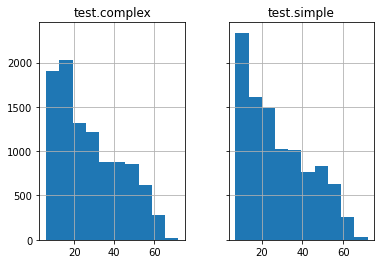

In [32]:
test_df.hist(sharey=True)

,valid.complex,valid.simple
count,10000.000000,10000.00000
mean,27.745000,27.62160
std,15.435206,15.45242
min,6.000000,6.00000
25%,14.000000,14.00000
50%,24.000000,24.00000
75%,39.000000,39.00000
max,75.000000,76.00000


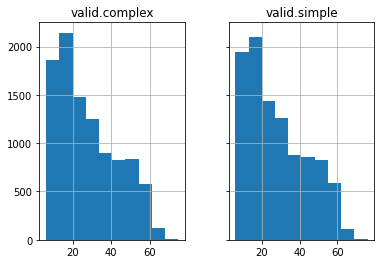

In [30]:
valid_df.hist(sharey=True)
valid_df.describe()

array([[<AxesSubplot:title={'center':'train.complex'}>,
        <AxesSubplot:title={'center':'train.simple'}>]], dtype=object)

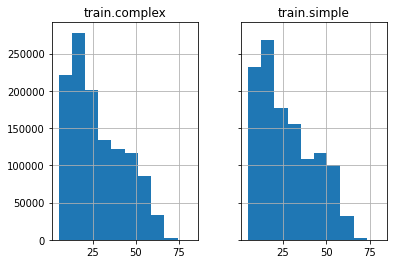

In [31]:
train_df.hist(sharey=True)

In [27]:
train_df.describe()

,train.complex,train.simple
count,1.194945e+06,1.194945e+06
mean,2.780312e+01,2.770819e+01
std,1.531925e+01,1.534766e+01
min,5.000000e+00,5.000000e+00
25%,1.400000e+01,1.400000e+01
50%,2.400000e+01,2.400000e+01
75%,3.900000e+01,3.900000e+01
max,8.200000e+01,8.100000e+01


In [45]:
def plot_doc_lengths(data_path, level):
    data = {}
    for file in Path(data_path).glob(f'*.en.{level}.txt'):
        data[str(file.stem)] = None
        with open(file, 'r', encoding='utf8') as f:
            data[str(file.stem)] = get_token_count(f.read())

    df = pd.DataFrame.from_dict(data, orient='index')
    df.hist(bins=25)

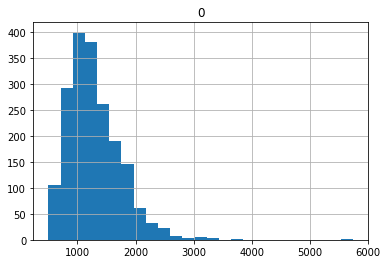

In [46]:
plot_doc_lengths('/srv/scratch6/kew/ats/data/en/newsela_article_corpus_2016-01-29/articles', 0)

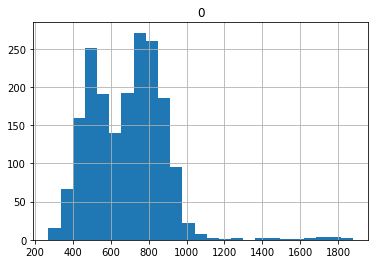

In [47]:
plot_doc_lengths('/srv/scratch6/kew/ats/data/en/newsela_article_corpus_2016-01-29/articles', 4)